# Interpolacje


### Definicja
Dana jest funkcja y=f(x) określona i ciągła na danym przedziale [a,b], która przyjmuje wartosci $y_{1}$,$y_{2}$,....,$y_{n}$ dla skończonego zbioru argumentów $x_{1}$,$x_{2}$,...,$x_{n}$, czyli $y_{i}$=f($x_{i}$) dla i=1,...,n <br>
Zbiór argumentów {$x_{i}$} nazywamy *węzłami interpolacji*, przy czym zakłada się, że a $\leq$ $x_{1}$,$x_{2}$,...,$x_{n}$ $\leq$ b
<br> Sama interpolacja polega na znalezieniu innej 'przybliżonej' funkcji w danym przedziale, która w węzłach interpolacji przyjmuje te same wartości co oryginalna funkcja. Inaczej mówiąc, polega na wyznaczeniu przybliżonych wartości funkcji w punktach, które węzłami nie są, oraz na oszacowaniu błędu przybliżenia. Funkcję oryginalną nazywamy *funkcją interpolowaną*, a funkcję szukaną-*funkcją interpolującą*

Nie wchodząc w szczególy dotyczące kodu,dla zobrazowania definicji, poniższy przykład obrazuje dwa różne sposoby interpolacji:

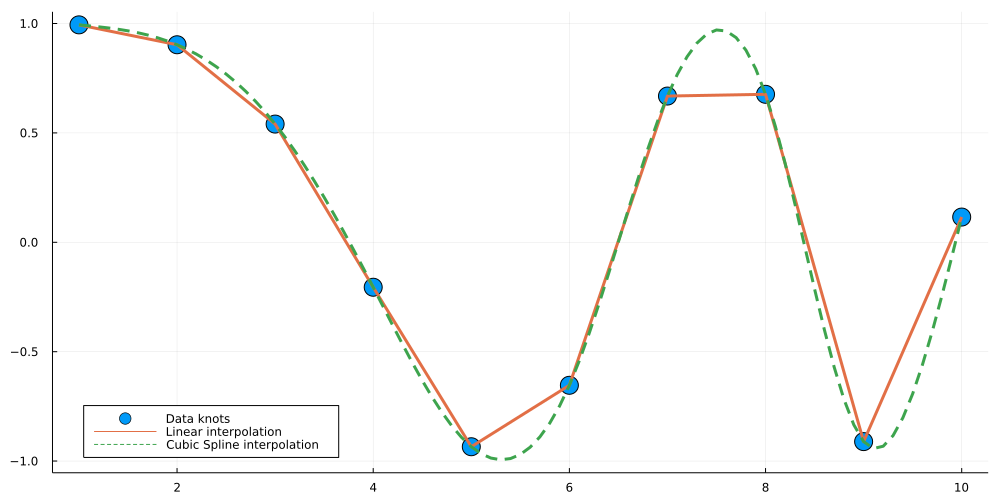

In [14]:
using Interpolations, Plots

# Lower and higher bound of interval
a = 1.0
b = 10.0
# Interval details
x = a:1.0:b

y = @. cos(x^2 / 9.0) # Function application by broadcasting
# Interpolations
itp_linear = LinearInterpolation(x, y)
itp_cubic = CubicSplineInterpolation(x, y)
# Interpolation functions
f_linear(x) = itp_linear(x)
f_cubic(x) = itp_cubic(x)
# Plots
width, height = 1000, 500 
x_new = a:0.1:b # smoother interval, necessary for cubic spline

scatter(x, y, markersize=10,label="Data knots")
plot!(f_linear, x_new, w=3,label="Linear interpolation")
plot!(f_cubic, x_new, linestyle=:dash, w=3, label="Cubic Spline interpolation")
plot!(size = (width, height))
plot!(legend = :bottomleft)

## Rodzaje interpolacji
Interpolacje można podzielić na wiele rodzajów. Najbardziej popularne to:<br><br>
Interpolacje liniowe:
  - wielomianowa
    - metoda Lagrange'a
    - wzór interpolacyjny Newtona(liniowa, kwadratowa, sześcienna)
    - wzór Neville'a
    - metoda Hermite'a
    - metoda Czebyszewa
  - trygonometryczna
  - funkcje sklejane

Interpolacje nieliniowe:
  - wymierna
  - wykładniczna


Warto wspomnieć, że Julia oferuje kilka bibliotek dotyczących interpolacji, przykładowo: BasicInterpolators, Interpolations, GridInterpolations, DataInterpolations. Zawierają większość z podstawowych metod interpolacji i będą przez nas wykorzystywane w dalszej części projektu, gdzie przyjrzymy się bliżej kilku wybranym metodom. 

### Interpolacja liniowa
Jedna z najprostszych metod interpolacyjnych przy użyciu wielomianu stopnia pierwszego czyli funkcji liniowej. Ponieważ funkcja liniowa jest jednoznacznie określona przez dwa punkty, więc interpolację należy przeprowadzić dla każdej pary kolejnych punktów z przedziału [a,b]. 
Stosując następujacy zapis:
$$ f(x)=b_{0}+b_{1}(x-x_{i}) $$
dla znanych punktów możemy zapisać<br>
$$ f(x=x_{i})=b_{0}+b_{1}(x_{i}-x_{i}) $$
$$ f(x_{i})=b_{0} $$
oraz<br>
$$ f(x=x_{i+1})=b_{0}+b_{1}(x_{i+1}-x_{i}) $$
$$ f(x=x_{i+1})=f(x_{i})+b_{1}(x_{i+1}-x_{i}) $$
Mamy więc:<br>
$$ b_{1}=\frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i}} $$
Zatem wartość funkcji interpolującej w punkcie z przedziału [$x_{i}$,$x_{i+1}$] można obliczyć ze wzoru:<br>
$$ f(x)=f(x_{i})+\frac{(f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i})}*(x-x_{i}) $$

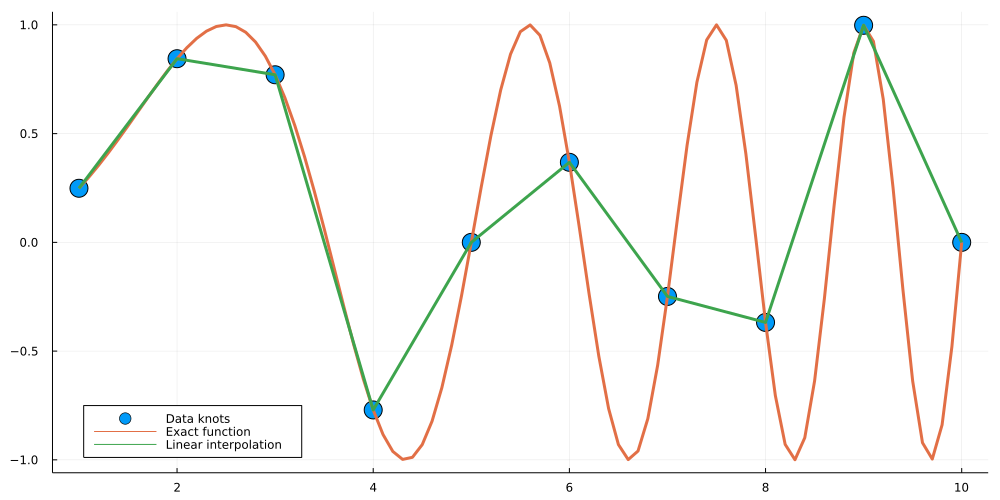

In [26]:
using Interpolations, Plots

a = 1.0
b = 10.0
x = a:1.0:b

y =@. sin(2pi*x^2/25) # Function application by broadcasting

itp_linear = LinearInterpolation(x, y)
f_linear(x) = itp_linear(x)
f_exact(x_ext)=sin(2pi*x_ext^2/25)
width, height = 1000, 500 
x_ext=a:0.1:b
scatter(x, y, markersize=10,label="Data knots")
plot!(f_exact, x_ext, w=3,label="Exact function")
plot!(f_linear, x, w=3,label="Linear interpolation")
plot!(size = (width, height))
plot!(legend = :bottomleft)

### Interpolacja kwadratowa

Interpolacja kwadratowa różni się od interpolacji liniowej wyłącznie stopniem wielomianu którego poszukujemy, czyli funkcji kwadratowej w postaci
$$ f(x)=a_{0}+a_{1}x+a_{2}x^2 $$
 Ponieważ funkcja kwadratowa jest jednoznacznie określona dla trzech punktów więc interpolację przeprowadzamy na przedziale [$x_{i-1}$,$x_{i+1}$] stosując zapis:
$$ f(x)=b_{0}+b_{1}(x-x_{i})+b_{2}(x-x_{i-1})(x-x_{i}) $$
Wartość współczynników wyznaczana jest na podstawie wartości funkcji  
f($x_{i-1}$), f($x_{i}$) i f($x_{i+1}$): <br>
$$ f(x=x_{i-1})=b_{0}+b_{1}(x_{i-1}-x_{i-1})+b_{2}(x_{i-1}-x_{i-1})(x_{i-1}-x_{i}) $$ 
$$ f(x_{i-1})=b_{0} $$ 
a także <br>
$$ f(x=x_{i})=b_{0}+b_{1}(x_{i}-x_{i-1})+b_{2}(x_{i}-x_{i-1})(x_{i}-x_{i}) $$ 
$$ f(x_{i})=b_{0}+b_{1}(x_{i}-x_{i-1}) $$
$$ b_{1}= \frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}} $$
oraz:<br>
    $$ b_{2}= \frac{
        \frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i}}-\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}}{x_{i+1}-x_{i-1}}$$
Porównując zapisy ze współczynnikami $a_{i}$ i $b_{i}$ możemy na podstawie współczynników $b_{0}$,$b_{1}$ i $b_{2}$ wyznaczyć $a_{0}$,$a_{1}$ i $a_{2}$ ze wzorów:
    $$ a_{0}=b_{0}-b_{1}x_{i-1}+b_{2}x_{i-1}x_{i} $$
    $$ a_{1}=b_{1}-b_{2}x_{i-1}-b_{2}x_{i} $$
    $$ a_{2}=b_{2} $$
I w ten sposób otrzyamy wzór na wartość funkcji interpolującej w punkcie z przedziału [$x_{i-1}$,$x_{i+1}$]


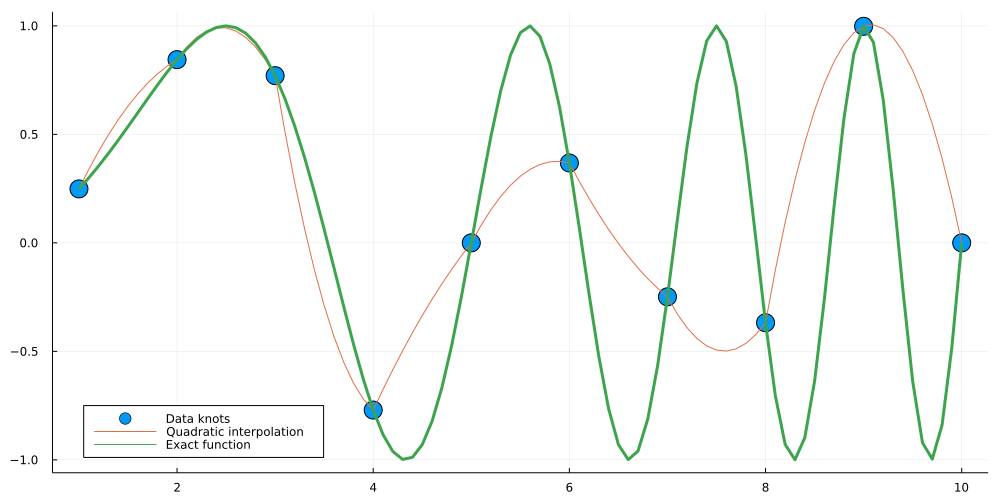

In [5]:
using DataInterpolations, Plots

a = 1.0
b = 10.0
x = a:1.0:b
x_ext=a:0.1:b
y =@. sin(2pi*x^2/25) # Function application by broadcasting
etp = QuadraticInterpolation(y, x)
f_quad(x) = etp(x)
f_exact(x_ext)=sin(2pi*x_ext^2/25)
width, height = 1000, 500 
scatter(x, y, markersize=10,label="Data knots")
plot!(f_quad,x_ext,label="Quadratic interpolation")
plot!(f_exact, x_ext, w=3,label="Exact function")
plot!(size = (width, height))
plot!(legend = :bottomleft)

### Interpolacja wielomianowa Lagrange'a

Interpolacja Lagrange'a jest metodą numeryczną polegającą na przybliżaniu funkcji, w której znane jest nam $ n+1 $ punktów wielomianem stopnia $ n $ przechodzacym przez te punkty.

Mając $n+1$ punktów $(x_i , y_i)$  wielomian Lagrange'a przyjmuje postać:

$$ L(x) = \sum_{i=0}^ny_i \cdot \prod_{j=0 \; \land\ j \neq i}^n\frac{x-x_j}{x_i-x_j} $$



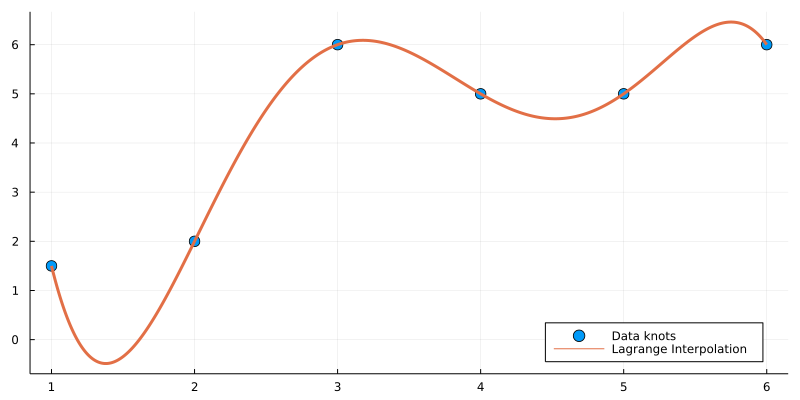

In [1]:
using DataInterpolations, Plots
xs = [  1, 2, 3, 4, 5, 6]
ys = [1.5, 2, 6, 5, 5, 6]

A = LagrangeInterpolation(ys, xs)
scatter(xs, ys, label="Data knots", markersize=6)
plot!(A, w=3, label = "Lagrange Interpolation")
plot!(legend = :bottomright, size=(800,400))

### Efekt Rungego

Zjawisko zwane **Efektem Rungego** polega na pogorszaniu się jakości interpolacji wielomianowej, mimo zwiększania ilości jej węzłów.

Przykład tego zjawiska najlepiej widać na funkcji Rungego danej wzorem $$ f(x) = \frac{1}{1+25x^2} $$ na przedziale $ [-1,1] $.

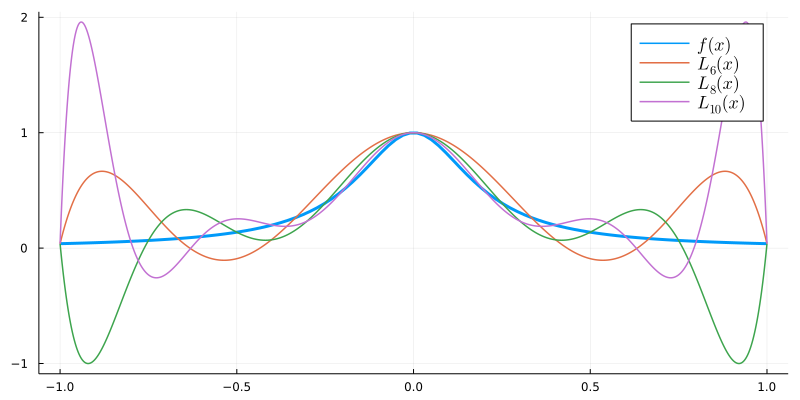

In [4]:
Runge(x) = 1/(1+25*x^2)

Xs = LinRange(-1,1,100)
Ys = Runge.(Xs)
plot(Xs, Ys, w=3, label="\$f(x)\$")

xs = LinRange(-1,1,7)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_6(x)\$")

xs = LinRange(-1,1,9)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_8(x)\$")

xs = LinRange(-1,1,11)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_{10}(x)\$")


plot!(size=(800,400))
plot!(legendfontsize=12)

### Węzły Czebyszewa

By uniknąć efektu Rungego przy interpolacji wielomianowej często zamiast równoodleglych węzłów korzysta się z tzn. **Węzłów Czebyszewa**, będącymi pierwiastkami wielomianu Czebyszewa.

Chcąc otrzymać $ n $ węzłów Czebyszewa w przedziale $(-1,1)$ korzystamy ze wzoru

$$ x_k = \cos\left(\frac{2k-1}{2n}\pi\right),\; k = 1,\dots,n $$

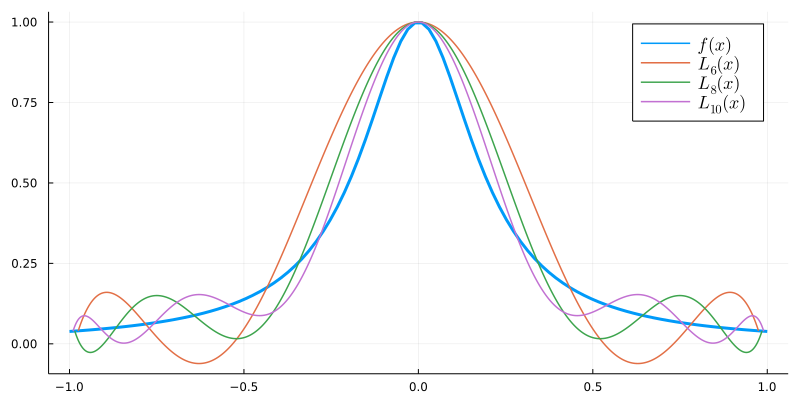

In [5]:
function xCzeb(n)
    k = 1:n
    return @. cos((2*k-1)/(2*n)*π)
end

Xs = LinRange(-1,1,100)
Ys = Runge.(Xs)
plot(Xs, Ys, w=3, label="\$f(x)\$")

xs = xCzeb(7)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_6(x)\$")

xs = xCzeb(9)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_8(x)\$")

xs = xCzeb(11)
ys = Runge.(xs)
A = LagrangeInterpolation(ys, xs)
plot!(A, w=1.5, label="\$L_{10}(x)\$")

plot!(size=(800,400))
plot!(legendfontsize=12)

### Interpolacja funkcjami sklejanymi

Metoda ta polega na przybliżaniu nieznanej funkcji wielomianami niskiego stopnia.

Mając $n+1$ punktów $(x_i , y_i)$ z przedziału $ [a, b] $ dla każdych dwóch kolejnych tworzy się osobny przedział i w każdym z nich interpoluje się funkcję wielomianem interpolacyjnym stopnia $m$ (najczęśniej niskiego stopnia), takim by po połączeniu tych wielomianów funkcja sklejona $S(x)$ spełniała $ S(x) \in C^{m-1} $.



Interpolacja funkcjami sklejanymi jest często preferowana w stosunku do interpolacji wielomianowej, ponieważ pozwala uniknąć problemu **Efektu Rungego**, w którym oscylacja może wystąpić między punktami podczas interpolacji przy użyciu wielomianów wysokiego stopnia.

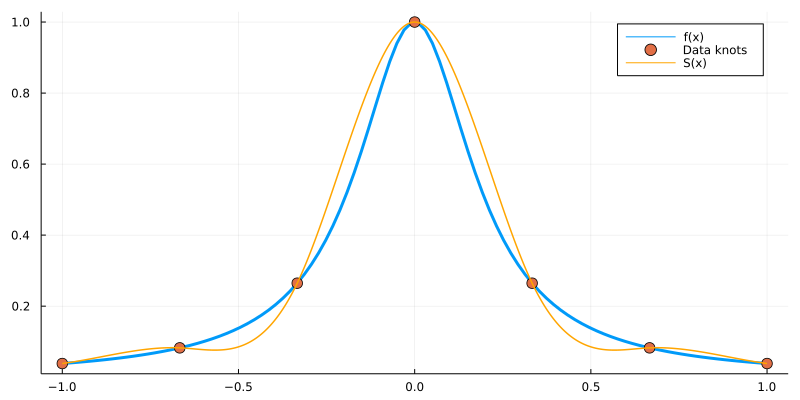

In [6]:
Runge(x) = 1/(1+25*x^2)

Xs = LinRange(-1,1,100)
Ys = Runge.(Xs)
plot(Xs, Ys, w=3, label="f(x)")

xs = LinRange(-1,1,7)
ys = Runge.(xs)
A = CubicSpline(ys, xs)
scatter!(xs,ys,label="Data knots", markersize=6)
plot!(A, w=1.5, label="S(x)", c=:orange)

plot!(size=(800,400))

### Interpolacja trygonometryczna

### Interpolacja wymierna

### Interpolacja wykładnicza

## Porównanie precyzji różnych interpolacji

# Zastosowania

## Meteorologia
W meteorologi najczęściej korzystami z interpolacji przestrzennej. Polega ona na określaniu wartości szacunkowych w miejscach, gdzie próba terenowa nie była pobierana, z jednoczesnym założeniem istnienia autokorelacji przestrzennej – tym silniejszej, im mniejsza jest odległość między lokalizacją danych. Interpolacja przestrzenna pozwala na podstawie danych punktowych obliczyć wartości zjawiska w całym analizowanym obszarze. Jej przykładowym zastosowaniem jest:<br>
  - Opracowywanie map izoliniowych
  - Resampling danych rastrowych
  - Opracowywanie map pola opadu, razkładu temperatury, itp.

### Poligony Thiessen’a
Poligony są zdefiniowane granicami o równych odległościach od zadanego
zbioru danych punktowych. Charakterystyczną właściwością tych poligonów
jest to, że ich granice znajdują się dokładnie w środku odległości między
sąsiadującymi punktami.

Granice definiują „obszar wpływu” dla każdego punktu. Na przykład punktami
mogą być lokalizacje punktów pomiaru opadu, a granice poligonów definiują w tym
przypadku tzw. „wieloboki równego zadeszczenia”.

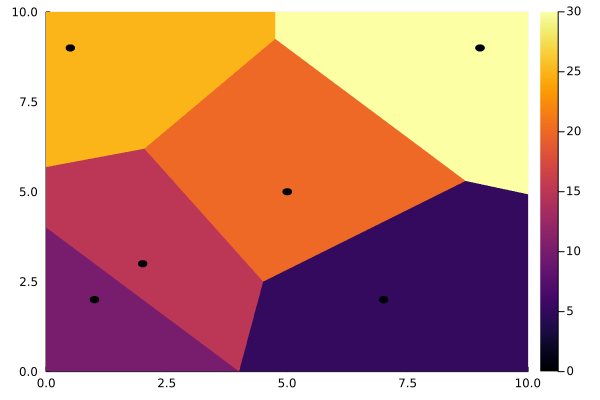

In [7]:
using Plots
function d(x,y)
    return sqrt((x[1]-y[1])^2 + (x[2]-y[2])^2)
end


function dist(x,y)
    points_list = [[1,2,10],[2,3,15],[0.5,9,25],[5,5,20],[7,2,5],[9,9,30]]
    distances_list = []
        for i in 1:length(points_list)
            k = d([x,y], points_list[i])
            push!(distances_list, k)
        end
    if (findmin(distances_list))[1] <= 0.1
        return 0
    else
        return points_list[argmin(distances_list)][3]
    end
end

x = range(0, 10, step = 0.005)
y = range(0, 10, step = 0.005)
Plots.heatmap(x, y, dist)

### Metoda odwrotnych odległości
Nieznana wielkość zmiennej w dowolnym punkcie szacowana jest poprzez
obliczenie średniej ważonej z obserwacji w otoczeniu.

Wagi obserwacji jest odwrotnie proporcjonalna do odległości pomiędzy punktem
pomiarowym a punktem interpolowanym.

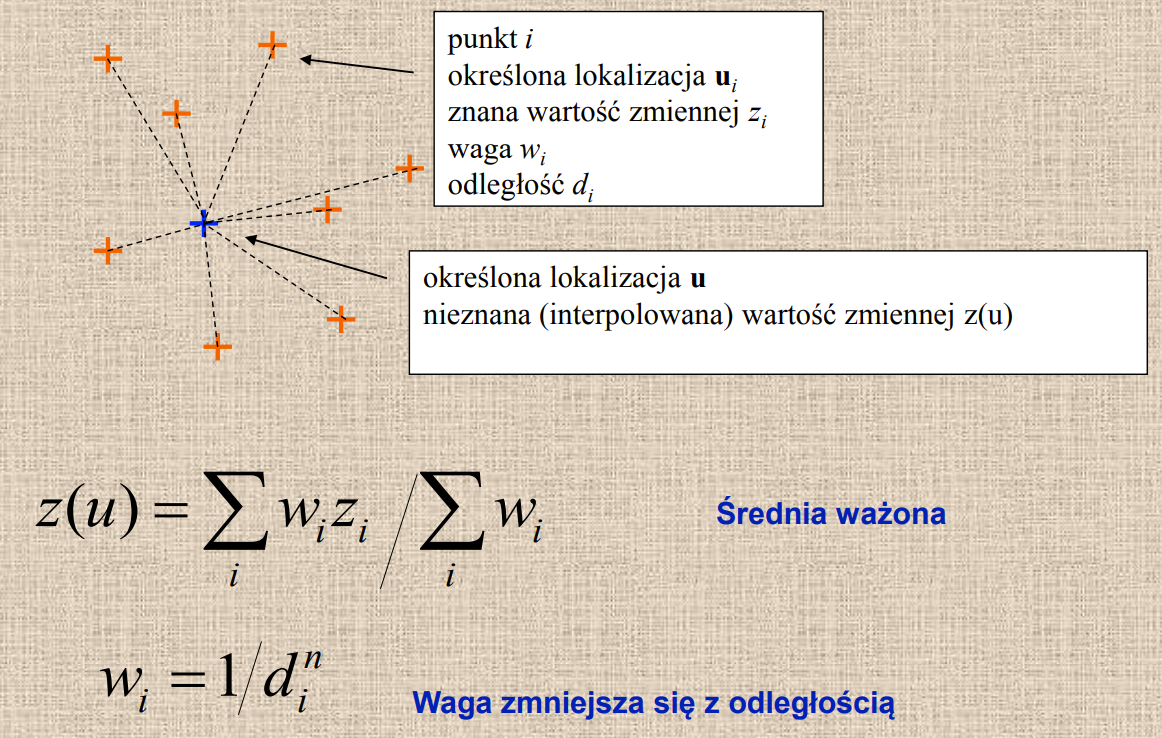

In [8]:
using Images, FileIO
img = load("IDW.png")

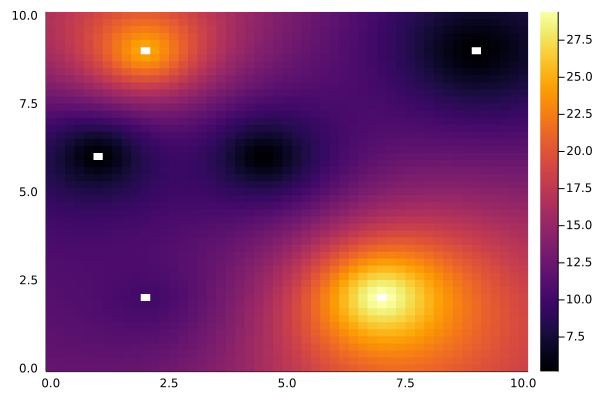

In [9]:
using Plots

function z(x, y) 
    point_list = [[2,2,10],[1,6,5],[2,9,25],[4.5,6,5],[9,9,5],[7,2,30]]
    distances = 0
    weights = 0
    exponent = 1.5
    for i in 1:length(point_list)
        distances += point_list[i][3]/((sqrt((x-point_list[i][1])^2 + (y-point_list[i][2])^2)))^exponent
        weights += 1/((sqrt((x-point_list[i][1])^2 + (y-point_list[i][2])^2)))^exponent
    end
    value = distances / weights
    return value
end

#x = LinRange(0, 1, 10)
x = range(0, 10, step = 0.2)
y = range(0, 10, step = 0.2)
Plots.heatmap(x, y, z)


(process:16848): GLib-GIO-WARNING **: 00:11:37.621: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.9.0_x86__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 168 extensions but has no verbs


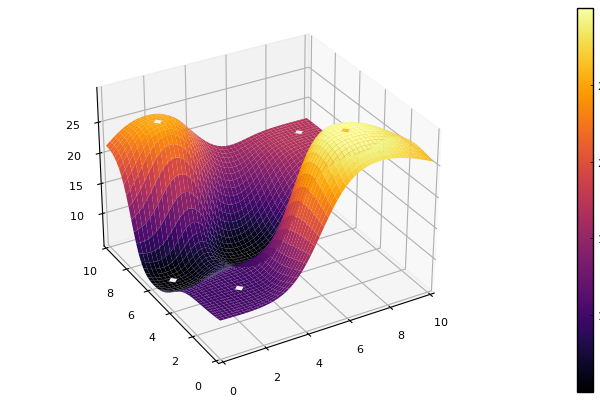

In [1]:
using Plots; pyplot()

function z(x, y) 
    point_list = [[2,2,10],[1,6,5],[2,9,25],[4.5,6,5],[9,9,17],[7,2,30]] # x coord, y coord, value
    distances = 0
    weights = 0
    p = 3 
    for i in 1:length(point_list)
        distances += point_list[i][3]/((sqrt((x-point_list[i][1])^2 + (y-point_list[i][2])^2)))^p
        weights += 1/((sqrt((x-point_list[i][1])^2 + (y-point_list[i][2])^2)))^p
    end
    value = distances / weights
    return value
end

x = range(0, 10, step = 0.2)
y = range(0, 10, step = 0.2)
Plots.plot(x, y, z,st=:surface,camera=(-30,30))

### Grafika komputerowa